### MSR 
- Markov Switching Regression (MSR) is given by the following equation for $t=1,\ldots, T:$

$y_t = x_t^{'}  \beta_{S_t} + e_t$, $e_t$ ~ $N(0, \sigma_{S_t}^2)$

$\beta_{S_t} = \beta_0 (1 - S_t) + \beta_1 S_t$

$\sigma_{S_t}^2 = \sigma_0^{2} (1-S_t) + \sigma_1^{2} S_t$

- where $S_t = 0$ or $1$ represents two different possible regimes at time t

### Quasi-Maximum Likelihood estimation
- Following similar procedure as the Garch model, we will maximize the loglikelihood of the residual series.  Since the residuals are iid, by assumption, the log likelihood is given by:

$L_T(\theta) = \frac{1}{T} \sum_{t=1}^T \log f(y_t | F_{t-1};\theta)$
  
where $f(y_t | F_{t-1};\theta) = \frac{1}{\sqrt{2\pi\sigma_{S_t}^2}}e^{-\frac{(y_t - x_t^{'}\beta_{S_t})^2}{2\sigma^2_{S_t}}}$

## Problem
- $S_t$, $t=1,\ldots T$ is not observable.  So MLE is not applicable
- So use joint density instead: 

$f(y_t | F_{t-1};\theta) = \sum_{i=0}^1 f(y_t,S_t=i | F_{t-1};\theta) = \sum_{i=0}^1 f(y_t | S_t=i,F_{t-1};\theta) f(S_t | F_{t-1};\theta)$

Hence...

$L_T(\theta) = \frac{1}{T} \sum_{t=1}^T \log f(y_t | F_{t-1};\theta)$

where 

$f(y_t | F_{t-1};\theta) = \sum_{i=0}^1 f(y_t | S_t=i,F_{t-1};\theta) f(S_t | F_{t-1};\theta)$

- In order to access likelihood of state variable $S_t = i, i=0,1$, we need to evaluate its optimal forecast based on different information sets
- These forecasts include:
  - the __filtering probabilities__ given by $P(S_t = i | F_t; \theta)$ which is based on "current and past" information
  - __prediction probabilities__ given by $P(S_t = i | F_{t-1};\theta)$ which is based on information prior to time t 
  - __smoothing probabilities__ given by $P(S_t = i | F_T; \theta)$ which is based on full sample information 


### Filtering probabilities
In the filtering step, once $y_t$ is observed, probability terms are updatd as follows:
$ P(S_t = j | F_t) = P(S_t = j | y_t, F_{t-1}) = \frac{f(y_t, S_t = j | F_{t-1})}{f(y_t | F_{t-1})} = \frac{f(y_t | S_t = j, F_{t-1}) P(S_t = j | F_{t-1})}{\sum_{i=0}^1 f(y_t | S_t = i, F_{t-1}) P(S_t = i | F_{t-1})}$

- Lets collect the filtering probabilities into 2x1 vector $\pi_{t|t} = \begin{pmatrix} P(S_t = 0 | F_t ; \theta) \\ P(S_t = 1 | F_t ;\theta) \end{pmatrix}$
- Likewise, collecting the densities into a 2x1 vector $\eta_{t} = \begin{pmatrix} f(y_t, S_t = 0 | F_{t-1})\\ f(y_t, S_t = 1 | F_{t-1})\end{pmatrix}$
- Hence we see the filtering step can be rewritten as: 

$\pi_{t|t} = \frac{\pi_{t|t-1} \otimes \eta_t}{1^{'}(\pi_{t|t-1} \otimes \eta_t)}$

### Prediction probabilities
$P(S_t = j | F_{t-1};\theta) = \sum_{i=0}^{1} P(S_t = j, S_{t-1} = i | F_{t-1}) = \sum_{i=0}^{1} p_{ij} \pi_{i,{t-1 | t-1}} = \pi_{t-1 | t-1}^{'} P_j$

- $p_{ij} = P(S_t = j | S_{t-1} = i, F_{t-1} ; \theta)$ is the transition probabilities from state i at time t-1 to state j at time t.  
- $P_j$ is the jth column of transition matrix P

- $\pi_i(t-1)$ is the distribution given by: $P(S_{t-1} = i | F_{t-1})$

- $\pi_t = (\pi_0(t), \pi_1(t))^{'}$ is a 2x1 vector of probability distribution of state variables
- Collecting the probabilities above into a 2x1 vector, we see above can be rewritten as: 

$\pi_{t|t-1} = P \pi_{t-1 | t-1}$

### Smoothing probabilities
- To compute smoothing probabilities $P(St=i | F_T ; \theta)$ via kim's algorithm, note:
$P(S_t = i | S_{t+1} = j, F_T ; \theta) = P(S_t = i | S_{t+1} = j, F_t ; \theta) = \frac{P(S_t = i | F_t ; \theta) p_{ij}}{P(S_{t+1} = j | F_t ; \theta)}$

Now, conditioning on next timestep, we see...

$P(S_t = i | F_T ; \theta) = \sum_{j=0}^{1} P(S_t = i | S_{t+1} = j, F_T ; \theta) P(S_{t+1} = j | F_T ; \theta)$

Substituting the smoothing probabilities above, we get the desired equation:

$P(S_t = i | F_T ; \theta) = P(S_t = i | F_t ; \theta) \sum_{j=0}^{1} \frac{p_{ij} P(S_{t+1} = j | F_T ; \theta)}{P(S_{t+1} = j | F_t ; \theta)}$
- Collecting above in a matrix, we can see it can be rewritten as: 

$ \pi_{t|T} = \pi_{t|t} \otimes (P^{'} (\pi_{t+1 | T} \div \pi_{t+1 | t}))$
- So, given filtering probabilities computed in last step, $P(S_T = i | F_T ; \theta)$, we then compute $P(S_{T-1} = i | F_T ; \theta)$
- Iterate through the above steps, the smoothed probabilities can be computed for $T-1, T-2,\ldots 1$ given estimated parameters

### MSR-QMLE Algorithm
- __Step 1 - Initiate starting values__
  - Compute the transition matrix given by: $p_{00} = (1+e^{p_o})^{-1}$ and $p_{11} = (1+e^{q_o})^{-1}$
  - Linear solve for $\pi_{0|0}:  \begin{pmatrix} I_2 - P \\ 1_2^{'} \end{pmatrix} \pi_{0|0} = \begin{pmatrix} 0_{2x1} \\ 1 \end{pmatrix}$ Hence, letting $A = \begin{pmatrix} I_2 - P \\ 1_2^{'} \end{pmatrix}$, wee see $A \pi_{0|0} = \begin{pmatrix} 0_{2x1} \\ 1 \end{pmatrix}$   where $1_2$ is 2x1 vector of ones.  This happens to be the third column of $(A'A)^{-1}A'$
  - compute the predicted probabilities $\pi_{1|0} = P \pi_{0|0}$
  - Compute the densities $\eta_1 = \begin{pmatrix} f(y_1, S_1 = 0 | F_{0})\\ f(y_1, S_1 = 1 | F_{0})\end{pmatrix}$
- __Step 2__
  - Start the filter $\pi_{t|t} = \frac{\pi_{t|t-1} \otimes \eta_t}{1^{'}(\pi_{t|t-1} \otimes \eta_t)}$ for $t = 1,\ldots,T$
  - Compute the predicted probabilities $\pi_{t|t-1} = P \pi_{t-1 | t-1}$  for $t = 2,\ldots,T$
 - __Step 3__
   - Construct the loglikelihood function $L_T(\theta) = \frac{1}{T} \sum_{t=1}^T \log f(y_t | F_{t-1};\theta)$
 - __Step 4__
   - Use SLSQP to minimize the loglikelihood function and obtain the parameters


  ### Issues
  - the log-likelihood is a sum of complicated density functions.  So the optimizer will fail to converge and won't be robust.  
  - use EM algorithm to as initial guess and augment it with above minimization

  ### EM Algorithm
  Addresses the problem of estimating the parameters somewhat differently based on full information set.  Hence, constructed mainly out of smoothed probabilities
  - Suppose we have an estimation problem where we have a training set $((y_1,s_1), (y_2,s_2),...(y_T,s_T),))$

  - Assume the set $(s_t)_{t=1}^T$ has been realized.  $s_t$ ~ Bernoulli rv
  - We wish to fit the model $p(y_t, s_t | F_{t-1}, S_{t-1}; \theta)$
  - To find the joint, notice that...

  $p(y_t, s_t | F_{t-1}, S_{t-1};\theta) = \frac{p(y_t, s_t, s_{t-1} | F_{t-1};\theta)}{p(s_{t-1};\theta)} = \frac{p(y_t | s_t,s_{t-1}, F_{t-1};\theta) p(s_t | s_{t-1},F_{t-1};\theta) p(s_{t-1};\theta)}{p(s_{t-1};\theta)} = p(y_t|s_t;\theta) p(s_t | s_{t-1};\theta)$
  
  - Hence for two states, we have: 

$p(y_t, s_t | F_{t-1}, S_{t-1};\theta) = (f(y_t;\mu_0, \sigma_0^2) p_{00})^{(1-s_t)(1-s_t)}$ * $(f(y_t;\mu_0, \sigma_0^2) p_{10})^{(1-s_t)s_{t-1}}$

### assume markov switching with just switching in mean, i.e
$$ y_t = \mu_{S_t} + e_t $$


In [1]:
# load the data from statsmodels for initial comparison test
np.set_printoptions(suppress=True)
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds
dta_fedfunds = pd.Series(fedfunds, index=pd.date_range('1954-07-01', '2010-10-01', freq='QS'))

In [2]:
from marketlearn.learning.markov_models.markov_switch import MarkovSwitchModel
obs = dta_fedfunds.to_numpy()
msm = MarkovSwitchModel()



In [3]:
np.zeros([2, 2])

array([[0., 0.],
       [0., 0.]])

In [4]:
_ = msm.fit(obs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.2510203193943497
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
Finished 'fit' in 0.2367 secs


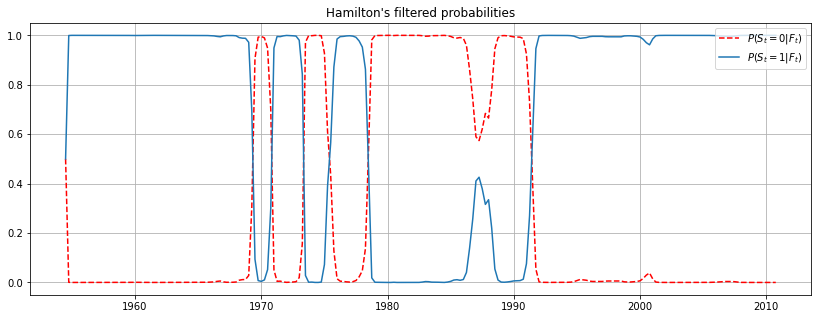

In [5]:
plt.figure(figsize=(14, 5))
dates = dta_fedfunds.index
plt.plot(dates, msm.filtered_prob[:, 0], label="$P(S_t = 0 | F_t)$", linestyle='--', color='r');
plt.plot(dates, msm.filtered_prob[:, 1], label="$P(S_t = 1 | F_t)$");
plt.title("Hamilton's filtered probabilities");
plt.legend(loc='upper right');
plt.grid();

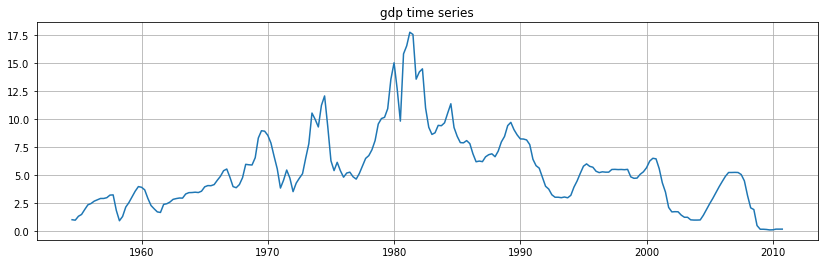

In [6]:
plt.figure(figsize=(14, 4))
plt.title("gdp time series");
plt.plot(dates, obs);
plt.grid();

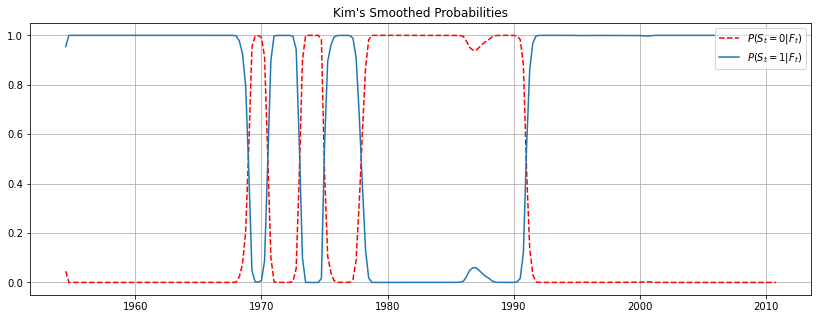

In [22]:
plt.figure(figsize=(14, 5))
dates = dta_fedfunds.index
plt.plot(dates, msm.smoothed_prob[:, 0], label="$P(S_t = 0 | F_t)$", linestyle='--', color='r');
plt.plot(dates, msm.smoothed_prob[:, 1], label="$P(S_t = 1 | F_t)$");
plt.title("Kim's Smoothed Probabilities");
plt.legend(loc='upper right');
plt.grid();

In [10]:
msm.em_params.tail()

,p11,p22,regime1_mean,regime2_mean,regime_vol
em_iterations,,,,,
5,0.974019,0.954563,3.702174,9.490066,2.109360
6,0.974032,0.953501,3.719121,9.538409,2.105790
7,0.973994,0.953039,3.724963,9.554408,2.104921
8,0.973974,0.952859,3.727031,9.559994,2.104655
9,0.973965,0.952791,3.727773,9.561990,2.104564


In [17]:
from dataclasses import dataclass, field

@dataclass
class Data:
    rows: list
    cols: list = field(init=False, default_factory=[]) 
    blocks: list = field(init=False)
    ref: dict = field(init=False)

In [18]:
test = Data([1, 2, 3])

TypeError: 'list' object is not callable

In [25]:
np.array([...])

array([Ellipsis], dtype=object)

In [24]:
x

array([0.5       , 0.81682095, 0.93399523, 0.97337643, 0.97999381,
       0.98051642, 0.98050917, 0.98047863, 0.9804645 , 0.98045927])